In [2]:
#Versión 2.0, co montecarlo completo (ten info dos lambda1, 2 e do xib)


#IMPORTS

from numpy import *
import pandas as pd 
import matplotlib.pyplot as plt
import uproot
import numpy as np

#abro datos COMPLETOS (dos 3 anos)
file0 = uproot.open('/scratch48/xabier.cid/Sexaquark/Sexaquark_ll_lc_2018.root')
tree_data0=file0["TupleXib_signal/DecayTree;1"]; 
#pd_data1=tree_data0.arrays(library='pd') 

file2 = uproot.open('/scratch48/xabier.cid/Sexaquark/Sexaquark_ll_lc_2017.root')
tree_data2=file2["TupleXib_signal/DecayTree;1"]; 
#pd_data2=tree_data2.arrays(library='pd')

file3 = uproot.open('/scratch48/xabier.cid/Sexaquark/Sexaquark_ll_lc_2016.root')
tree_data3=file3["TupleXib_signal/DecayTree;1"]; 
pd_data3=tree_data3.arrays(library='pd')

#abro montecarlo
file1 = uproot.open('/scratch48/xabier.cid/Sexaquark/Sexaquark_ll_lc_MC.root')
tree_data1=file1["TupleXib_signal;1"]; 
pd_data1=tree_data1.arrays(library='pd')


#printeo todas as variables das columnas do dataframe
#column_headers = list(pd_data1.columns.values)
#print("The Column Header :", column_headers)

/home3/brais.fernandez/miniconda3/envs/myenv/lib/python3.11/site-packages/uproot/interpretation/library.py:795: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]
/home3/brais.fernandez/miniconda3/envs/myenv/lib/python3.11/site-packages/uproot/interpretation/library.py:795: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]
/home3/brais.fernandez/miniconda3/envs/myenv/lib/python3.11/site-packages/uproot/interpretation/library.py:795: PerformanceWarning: DataFrame is highly fragmented.  Thi

In [4]:
#Vexo que columnas son as máis interesantes para a bdt, isto dependerá de que decay sexa o de interese


varinteresantesdatos=['Lambdac2595_IPCHI2_OWNPV', 'Lambdac2595_FDCHI2_OWNPV', 'Lambdac2595_DIRA_OWNPV', 'Lambdac2595_PT', 'Lambdac_PT', 'Lambdac2595_ENDVERTEX_CHI2', 'Lambdac_ENDVERTEX_CHI2',
                       'Lambdac_IPCHI2_OWNPV',
              'Lambdac_FDCHI2_OWNPV', 'Lambdac_DIRA_OWNPV']
#varinteresantesmc=['Lambda_c2595_IPCHI2_OWNPV', 'Lambda_c2595_FDCHI2_OWNPV', 'Lambda_c2595_DIRA_OWNPV', 'Lambda_c2595_PT', 'Lambda_c_PT', 'Lambda_c2595_ENDVERTEX_CHI2', 'Lambda_c_ENDVERTEX_CHI2',
#                    'Lambda_c_IPCHI2_OWNPV',
#              'Lambda_c_FDCHI2_OWNPV', 'Lambda_c_DIRA_OWNPV']



#apunto manualmente os rangos interesantes dos histogramas
ranges=[(0, 1500), (0, 1000), (-1, 1), (0, 20000), (0, 12000), (0, 10), (0, 10), (0, 100), (0, 100), (0, 4), (0, 4)]



In [5]:
#Abro datos e montecarlo coas columnas que me interesa para a bdt

#Datos que interesan para bdt (file0 é datos, xa no import, e file1 montecarlo, xa no import)
#tree0=file0["TupleXib_signal/DecayTree;1"] 
tree1=file1["TupleXib_control;1"]

#branches son o nome das columnas que me interesan para a bdt


branches0 =['Lambdac2595_IPCHI2_OWNPV', 'Lambdac2595_FDCHI2_OWNPV', 'Lambdac2595_DIRA_OWNPV', 'Lambdac2595_PT', 'Lambdac_PT', 'Lambdac2595_ENDVERTEX_CHI2', 'Lambdac_ENDVERTEX_CHI2', 'Lambdac_IPCHI2_OWNPV', 'Lambdac_FDCHI2_OWNPV',
            'Lambdac_DIRA_OWNPV', 'KFromLc_PT', 'pFromLc_PT', 'piFromLc_PT', 'pi1FromLc2595_PT', 'pi2FromLc2595_PT',
            'KFromLc_IPCHI2_OWNPV', 'pFromLc_IPCHI2_OWNPV', 'piFromLc_IPCHI2_OWNPV', 'pi1FromLc2595_IPCHI2_OWNPV', 'pi2FromLc2595_IPCHI2_OWNPV',
            'Lambda1_IPCHI2_OWNPV', 'Lambda2_IPCHI2_OWNPV', 'Lambda1_PT', 'Lambda2_PT', 'Xib_VCHI2PERDOF', 'Xib_DOCA', 'Xib_ENDVERTEX_CHI2', 'Xib_DIRA_OWNPV',
                     'Xib_IPCHI2_OWNPV','pFromL1_MC12TuneV3_ProbNNp', 'pFromL2_MC12TuneV3_ProbNNp', 'pFromLc_MC12TuneV2_ProbNNp', 
                     'piFromLc_MC12TuneV2_ProbNNpi','KFromLc_ProbNNk','pFromLc_ProbNNp', 'piFromLc_ProbNNpi','pi1FromLc2595_ProbNNpi',
                     'pi2FromLc2595_ProbNNpi',

#esta seguinte parte de branches non se usa para adestrar, só para plottear
              'Lambdac2595_MM', 'Lambdac_MM', 'Lambda1_MM', 'Lambda2_MM', 'Xib_MM', 'pFromL1_TRACK_Type', 'piFromL1_TRACK_Type',  'pFromL2_TRACK_Type', 'piFromL2_TRACK_Type', 'Xib_FDCHI2_OWNPV', 'Lambdac2595_DOCA', 'Lambda1_ENDVERTEX_X', 'Lambda1_ENDVERTEX_Y', 'Lambda1_ENDVERTEX_Z',
              'Lambda2_ENDVERTEX_X', 'Lambda2_ENDVERTEX_Y', 'Lambda2_ENDVERTEX_Z', 'Lambda1_PX', 'Lambda2_PX', 'Lambda1_PY', 'Lambda2_PY',
              'Lambda1_PZ', 'Lambda2_PZ', 'pFromLc_TRACK_Type', 'piFromLc_TRACK_Type', 'KFromLc_TRACK_Type', 'Lambdac_P', 'Lambdac_cpt_0.90']
#df_Datos = tree.arrays(expressions=branches0, library='pd')
df_Datos1=tree_data0.arrays(expressions=branches0, library='pd')
df_Datos2=tree_data2.arrays(expressions=branches0, library='pd')
df_Datos3=tree_data3.arrays(expressions=branches0, library='pd')
#branches1=['Lambda_c2595_IPCHI2_OWNPV', 'Lambda_c2595_FDCHI2_OWNPV', 'Lambda_c2595_DIRA_OWNPV', 'Lambda_c2595_PT', 'Lambda_c_PT', 'Lambda_c2595_ENDVERTEX_CHI2', 'Lambda_c_ENDVERTEX_CHI2', 'Lambda_c_IPCHI2_OWNPV', 'Lambda_c_FDCHI2_OWNPV',
#            'Lambda_c_DIRA_OWNPV', 'Kminus_PT', 'pplus_PT', 'piplus_PT', 'pi_soft_plus_PT', 'pi_soft_minus_PT',
#           'Kminus_IPCHI2_OWNPV', 'pplus_IPCHI2_OWNPV', 'piplus_IPCHI2_OWNPV', 'pi_soft_plus_IPCHI2_OWNPV', 'pi_soft_minus_IPCHI2_OWNPV',
#esta seguinte parte de branches non se usa para adestrar, só para plottear          
#              'Lambda_c2595_MM', 'Lambda_c_MM', 'nCandidate', 'totCandidates', 'eventNumber', 'L0DUTCK', 'HLT1TCK', 'HLT2TCK', 'GpsTime',
#              'BCType', 'OdinTCK', 'pi_soft_minus_cp_0.70', 'pi_soft_minus_PIDp', 'Lambda_c2595_Hlt2B2HHLTUnbiasedDecision_TIS', 
#              'Lambda_c2595_Hlt2B2HHLTUnbiasedDecision_TOS', 'Lambda_c2595_Hlt2Topo2BodySimpleDecision_Dec', 'Lambda_c2595_Hlt2Topo2BodySimpleDecision_TIS', 'Lambda_c2595_Hlt2Topo2BodySimpleDecision_TOS',
#                'Lambda_c2595_Hlt2Topo3BodySimpleDecision_Dec', 'Lambda_c2595_NumVtxWithinChi2WindowOneTrack', 'Lambda_c2595_SmallestDeltaChi2OneTrack',
#                'pplus_cpz_0.80', 'pplus_cpt_0.80', 'pplus_cp_0.80', 'pplus_cmult_0.80']
df_MC = tree1.arrays(expressions=branches0, library='pd')


mc_df=df_MC.copy()


Stored 'training_data' (DataFrame)


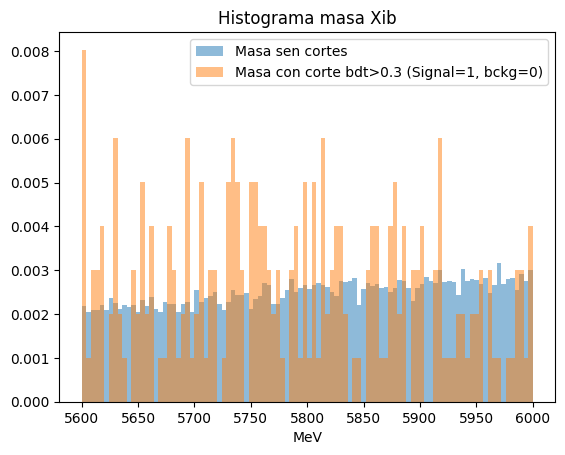

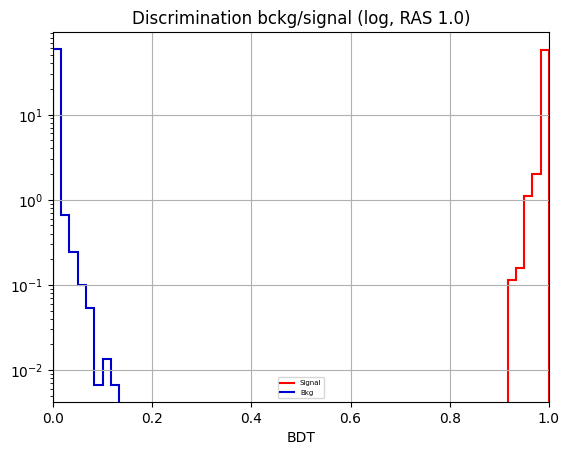

2740


/tmp/brais.fernandez/ipykernel_1276538/1676475178.py:150: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
/tmp/brais.fernandez/ipykernel_1276538/1676475178.py:156: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(data_df[data_df['BDT']>0.7][data_df['pFromLc_ProbNNp']>0.7][data_df['piFromLc_ProbNNpi']>0.7][data_df['KFromLc_ProbNNk']>0.7]['Lambdac_MM'], bins=100, alpha=0.7, density=True, label="Mass, cut bdt>0.7, PID>0.7 (Signal=1, bckg=0)", color="red")
/tmp/brais.fernandez/ipykernel_1276538/1676475178.py:156: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(data_df[data_df['BDT']>0.7][data_df['pFromLc_ProbNNp']>0.7][data_df['piFromLc_ProbNNpi']>0.7][data_df['KFromLc_ProbNNk']>0.7]['Lambdac_MM'], bins=100, alpha=0.7, density=True, label="Mass, cut bdt>0.7, PID>0.7 (Si

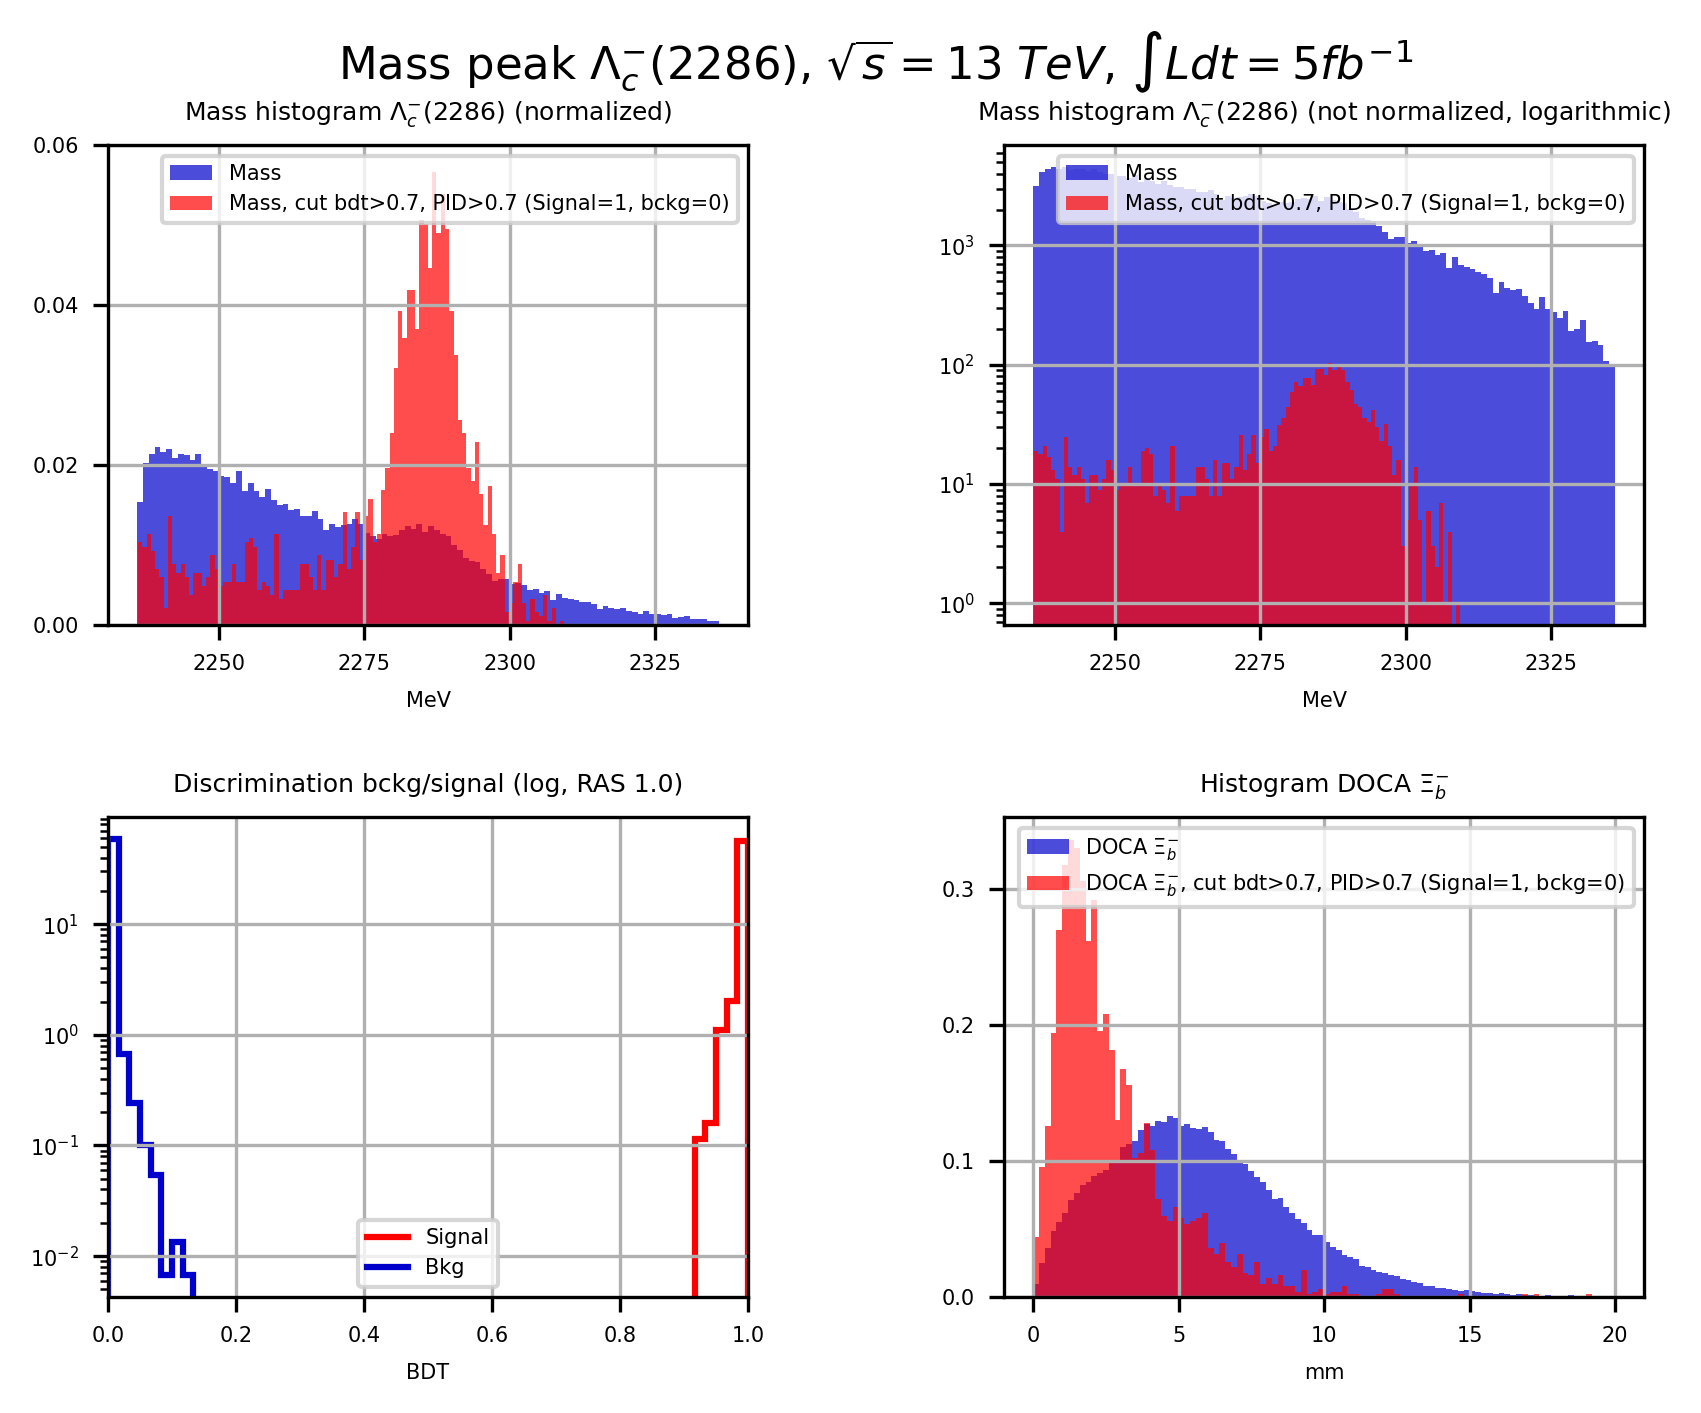

In [7]:
#PRIMEIRA BDT, RECREAR O PICO DO LAMBDAC O MELLOR POSIBLE

#BDT

import mplhep
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
import sklearn
#as training columns ogs:
training_columns=['Lambdac2595_IPCHI2_OWNPV', 'Lambdac2595_FDCHI2_OWNPV', 'Lambdac2595_DIRA_OWNPV', 'Lambdac2595_PT', 'Lambdac2595_ENDVERTEX_CHI2','pi1FromLc2595_PT','pi2FromLc2595_PT',
                  'pi1FromLc2595_IPCHI2_OWNPV', 'pi2FromLc2595_IPCHI2_OWNPV',
                   'Lambdac_PT',
                   'Lambdac_ENDVERTEX_CHI2',
                     'Lambdac_IPCHI2_OWNPV',
                     'Lambdac_FDCHI2_OWNPV', 
                     'Lambdac_DIRA_OWNPV', 
                     'KFromLc_PT', 
                     'pFromLc_PT', 
                     'piFromLc_PT',
                    'KFromLc_IPCHI2_OWNPV', 
                    'pFromLc_IPCHI2_OWNPV', 'piFromLc_IPCHI2_OWNPV',
                     'Lambda1_IPCHI2_OWNPV', 'Lambda2_IPCHI2_OWNPV', 
                     'Lambda1_PT', 'Lambda2_PT'
                     ] #'Xib_ENDVERTEX_CHI2']# 'Xib_DIRA_OWNPV',
                     #'Xib_IPCHI2_OWNPV', 'Xib_DOCA']




#training_columns=['Xib_ENDVERTEX_CHI2', 'Xib_DIRA_OWNPV',
 #                    'Xib_IPCHI2_OWNPV', 'Xib_DOCA', 'Xib_MM']

#concatenar os 3 dfs
df_Datos_=pd.concat([df_Datos1, df_Datos2, df_Datos3], axis=0)
df_Datos=data_dfn = df_Datos_.reset_index()


bkg_df=df_Datos.query('Lambdac_MM>2310' or 'Lambdac_MM<2276').copy()
#bkg_df=df_Datos.query('Lambdac2595_MM>2610' or 'Lambdac2595_MM<2585').copy()
#bkg_df=df_Datos.query(('Xib_MM>5900' or 'Xib_MM<5700') and ('Xib_ENDVERTEX_CHI2>0')).copy()

#print(bkg_df['Lambdac2595_MM'])

df_Datos1.to_json(r'/scratch48/dataframe2018.json'); df_Datos2.to_json(r'/scratch48/dataframe2017.json'); df_Datos3.to_json(r'/scratch48/dataframe2016.json')



#df_Datos.reset_index(inplace=True)
#df_Datos.to_json(r'/scratch48/dataframe.json')

bkg_df['category']=0
mc_df['category']=1

training_data = pd.concat([bkg_df, mc_df], copy=True, ignore_index=True)
%store training_data


bdt = XGBClassifier()
bdt.fit(training_data[training_columns], training_data['category'])


data_df=df_Datos.copy()

for df in [mc_df, bkg_df, data_df, training_data]:
    df['BDT'] = bdt.predict_proba(df[training_columns])[:,1]




#plot con/sen cuts bdt
plt.figure(9)
#plot sen cut en bdt
plt.title('Histograma masa Xib')
plt.hist(data_df['Xib_MM'], bins=100, alpha=0.5, density=True, label="Masa sen cortes", range=(5600, 6000))
#plot con cut en bdt
plt.hist(data_df[data_df['BDT']>0.3]['Xib_MM'], bins=100, alpha=0.5, density=True, label="Masa con corte bdt>0.3 (Signal=1, bckg=0)", range=(5600, 6000))
plt.legend(loc="best")
plt.xlabel("MeV")
plt.show()


#vemos se filtra ben ou non a bdt
def plot_comparision(var, mc_df, bkg_df):
    # create histograms
    hsig, bins = np.histogram(mc_df[var], bins=60, density=1, range=(0,1))
    hbkg, bins = np.histogram(bkg_df[var], bins=bins, density=1, range=(0,1))

    mplhep.histplot((hsig, bins), label='Signal', color="red")
    mplhep.histplot(hbkg, bins=bins, label='Bkg', color="mediumblue")
    plt.xlabel(var)
    plt.yscale("log")
    plt.grid()
    plt.title("Discrimination bckg/signal (log, RAS {})".format(sklearn.metrics.roc_auc_score(training_data['category'], training_data['BDT'])))
    plt.xlim(bins[0], bins[-1])
    plt.legend(loc='best', fontsize="5")
    
def plot_bkg(var, mc_df, bkg_df):
    # create histograms
    #hsig, bins = np.histogram(mc_df[var], bins=60, density=1, range=(0,1))
    hbkg, bins = np.histogram(bkg_df[var], bins=60, density=1, range=(0,1))

    #mplhep.histplot((hsig, bins), label='MC Signal', )
    mplhep.histplot(hbkg, bins=bins, label='MC Bkg')
    plt.xlabel(var)
    plt.xlim(bins[0], bins[-1])
    plt.legend(loc='best')



plot_comparision("BDT", mc_df, bkg_df)
plt.show()

print(len(data_df[data_df['BDT']>0.9]['Lambdac_MM']))



#CONXUNTO
fig = plt.figure(1312, dpi=300)
#título global

plt.rcParams.update({'font.size': 9})
plt.suptitle(r"Mass peak $\Lambda^{-}_c(2286)$, $\sqrt{s}=13$ $TeV$, $\int Ldt=5 fb^{-1}$")


#FIXO O NÚMERO DE TICKS EN AMBOS EIXES!(porque me saen poucos nos subplots)
plt.locator_params(nbins=6)


#tamaño letra, sácoo ao final para ter tamaño normal no resto
plt.rcParams.update({'font.size': 5})
#spacing entre os subplots
#fig.tight_layout(pad=5.0)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)




plt.subplot(2, 2, 1)
plt.title(r'Mass histogram $\Lambda^{-}_c(2286)$ (normalized)')
plt.hist(data_df['Lambdac_MM'], bins=100, alpha=0.7, density=True, label="Mass", color="mediumblue")
#plot con cut en bdt
plt.grid()
plt.ylim(0, 0.06)
plt.hist(data_df[data_df['BDT']>0.7][data_df['pFromLc_ProbNNp']>0.7][data_df['piFromLc_ProbNNpi']>0.7][data_df['KFromLc_ProbNNk']>0.7]['Lambdac_MM'], bins=100, alpha=0.7, density=True, label="Mass, cut bdt>0.7, PID>0.7 (Signal=1, bckg=0)", color="red")
plt.legend(loc="best", fontsize="5")
plt.xlabel("MeV")


plt.subplot(2, 2, 2)
plt.title(r'Mass histogram $\Lambda^{-}_c(2286)$ (not normalized, logarithmic)')
plt.yscale("log")
plt.hist(data_df['Lambdac_MM'], bins=100, alpha=0.7, label="Mass", color="mediumblue")
#plot con cut en bdt
plt.grid()
plt.hist(data_df[data_df['BDT']>0.7][data_df['BDT']>0.7][data_df['pFromLc_ProbNNp']>0.7][data_df['piFromLc_ProbNNpi']>0.7][data_df['KFromLc_ProbNNk']>0.7]['Lambdac_MM'], bins=100, alpha=0.7, label="Mass, cut bdt>0.7, PID>0.7 (Signal=1, bckg=0)", color="red")
plt.legend(loc="best", fontsize="5")
plt.xlabel("MeV")


plt.subplot(2, 2, 3)
plot_comparision("BDT", mc_df, bkg_df)




plt.subplot(2, 2, 4)
plt.title(r"Histogram DOCA $\Xi^{-}_b$")
plt.hist(data_df['Xib_DOCA'], bins=100, alpha=0.7, density=True, label=r"DOCA $\Xi^{-}_b$", color="mediumblue", range=(0, 20))
#plot con cut en bdt
plt.grid()
plt.hist(data_df[data_df['BDT']>0.7][data_df['pFromLc_ProbNNp']>0.7][data_df['piFromLc_ProbNNpi']>0.7][data_df['KFromLc_ProbNNk']>0.7]['Xib_DOCA'], bins=100, alpha=0.7, density=True, label=r"DOCA $\Xi^{-}_b$, cut bdt>0.7, PID>0.7 (Signal=1, bckg=0)", color="red", range=(0, 20))
plt.legend(loc="best", fontsize="5")
plt.xlabel("mm")


plt.rcParams.update({'font.size': 10})

Stored 'training_data' (DataFrame)


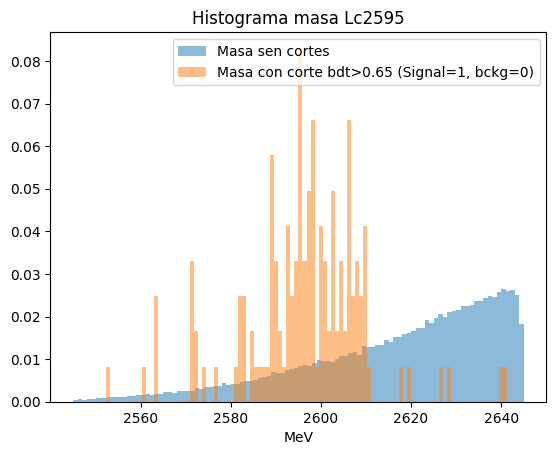

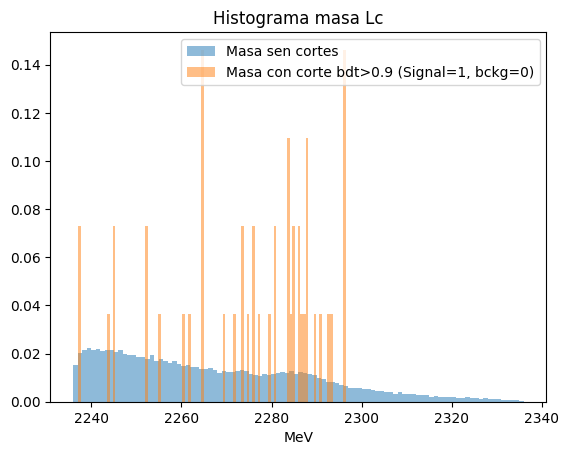

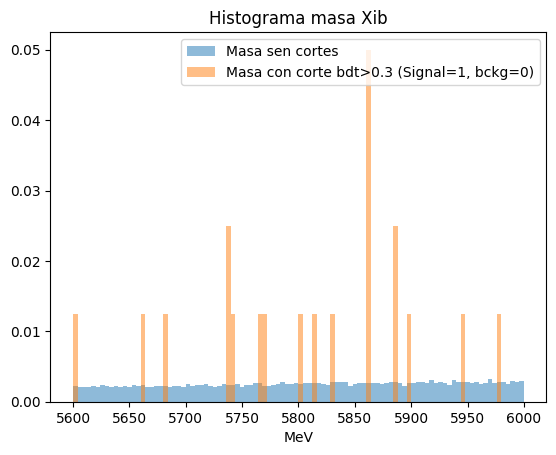

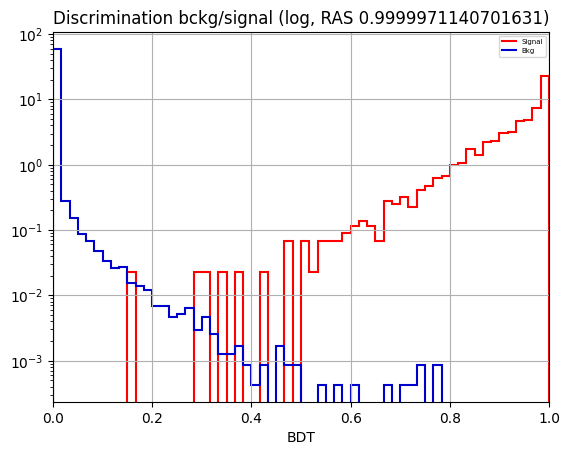

46


/tmp/brais.fernandez/ipykernel_1276538/1651370270.py:175: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


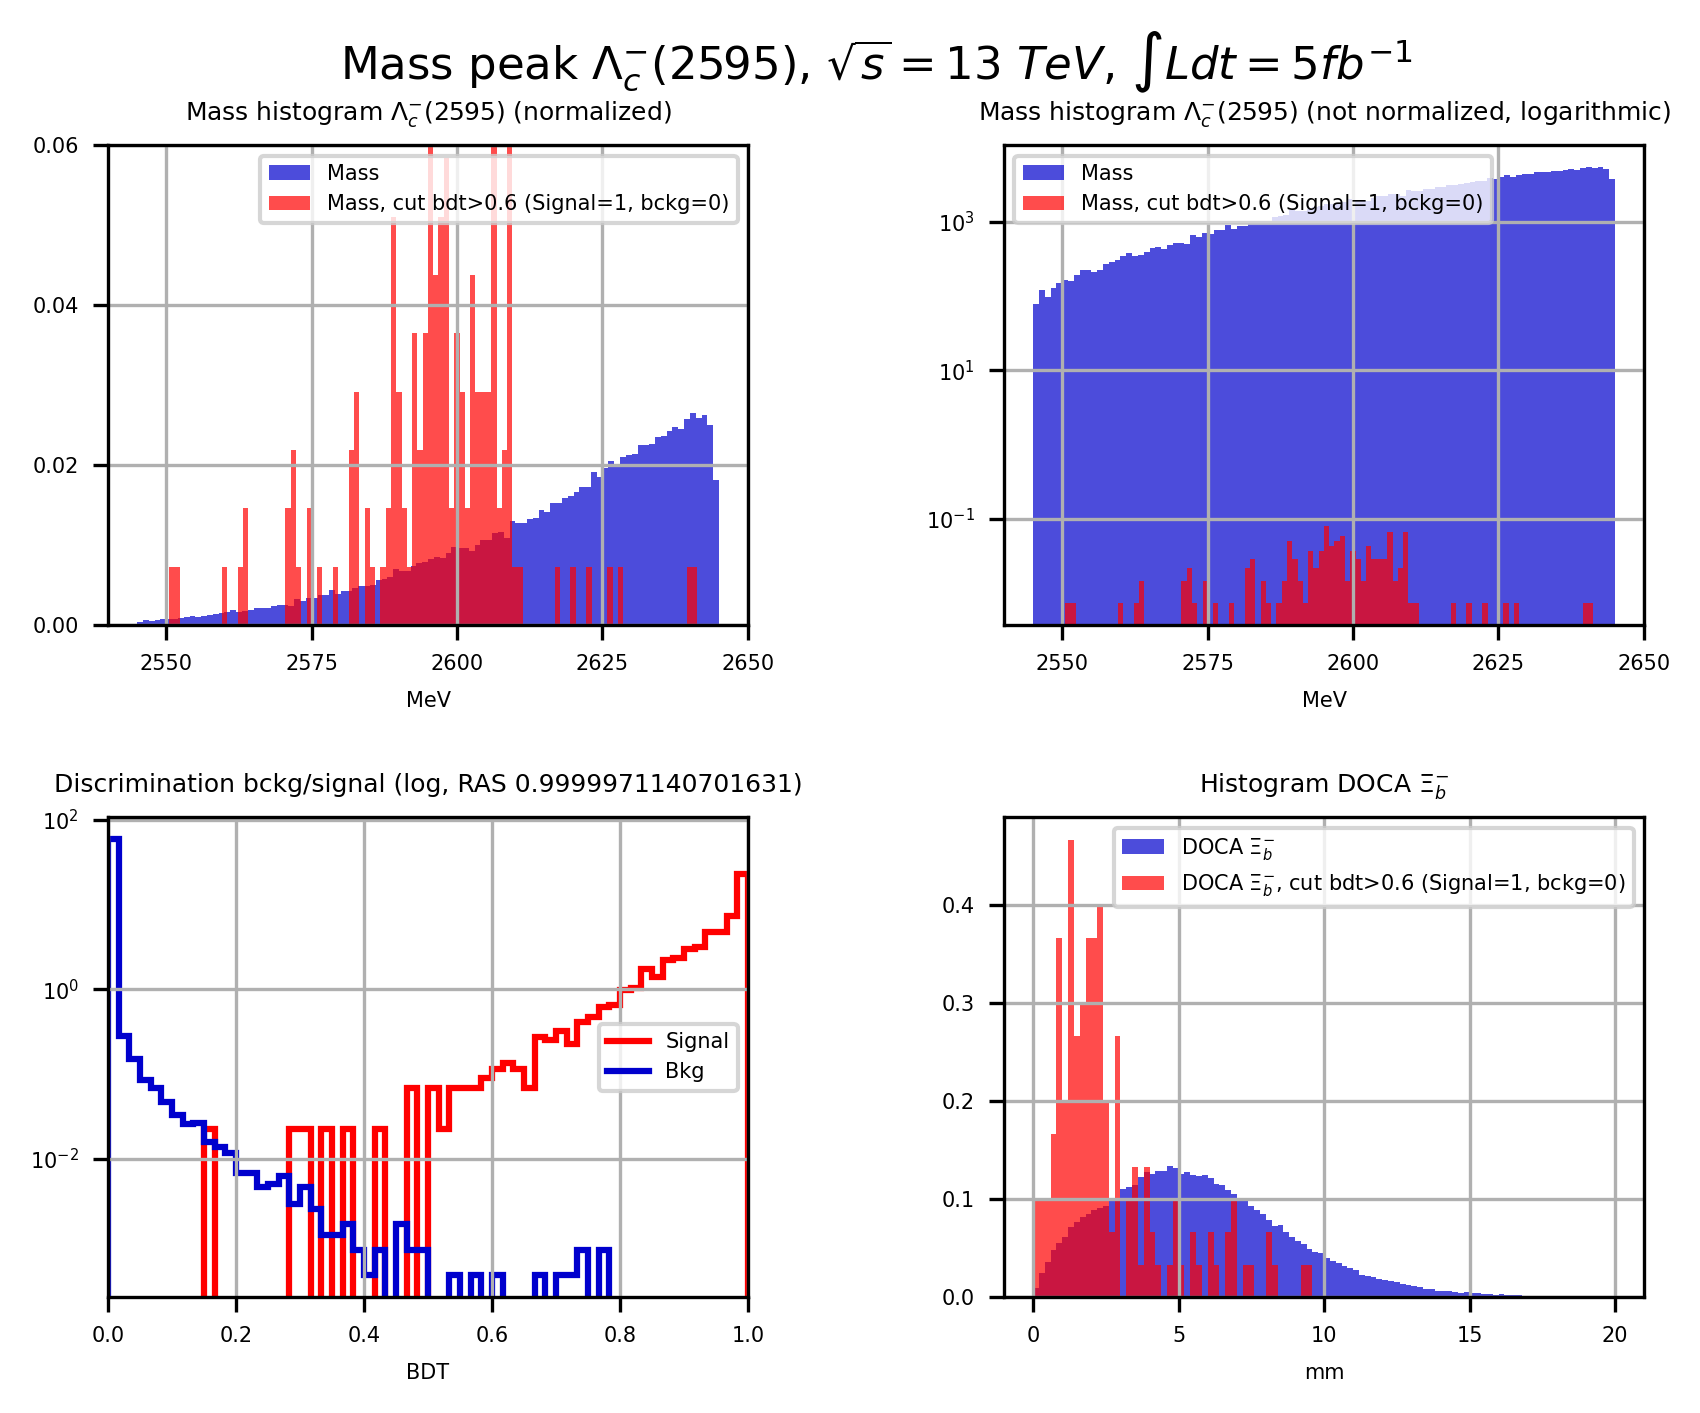

In [8]:
#SEGUNDA BDT, RECREAR O PICO DO LAMBDAC2595 O MELLOR POSIBLE

#BDT

import mplhep
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
import sklearn
#as training columns ogs:
training_columns=['Lambdac2595_IPCHI2_OWNPV', 'Lambdac2595_FDCHI2_OWNPV', 'Lambdac2595_DIRA_OWNPV', 'Lambdac2595_PT', 'Lambdac2595_ENDVERTEX_CHI2','pi1FromLc2595_PT','pi2FromLc2595_PT',
                  'pi1FromLc2595_IPCHI2_OWNPV', 'pi2FromLc2595_IPCHI2_OWNPV',
                   'Lambdac_PT',
                   'Lambdac_ENDVERTEX_CHI2',
                     'Lambdac_IPCHI2_OWNPV',
                     'Lambdac_FDCHI2_OWNPV', 
                     'Lambdac_DIRA_OWNPV', 
                     'KFromLc_PT', 
                     'pFromLc_PT', 
                     'piFromLc_PT',
                    'KFromLc_IPCHI2_OWNPV', 
                    'pFromLc_IPCHI2_OWNPV', 'piFromLc_IPCHI2_OWNPV',
                     'Lambda1_IPCHI2_OWNPV', 'Lambda2_IPCHI2_OWNPV', 
                     'Lambda1_PT', 'Lambda2_PT'
                     ] #'Xib_ENDVERTEX_CHI2']# 'Xib_DIRA_OWNPV',
                     #'Xib_IPCHI2_OWNPV', 'Xib_DOCA']




#training_columns=['Xib_ENDVERTEX_CHI2', 'Xib_DIRA_OWNPV',
 #                    'Xib_IPCHI2_OWNPV', 'Xib_DOCA', 'Xib_MM']

#concatenar os 3 dfs
df_Datos_=pd.concat([df_Datos1, df_Datos2, df_Datos3], axis=0)
df_Datos=data_dfn = df_Datos_.reset_index()


#bkg_df=df_Datos.query('Lambdac_MM>2310' or 'Lambdac2595_MM<2276').copy()
bkg_df=df_Datos.query('Lambdac2595_MM>2610' or 'Lambdac2595_MM<2585').copy()
#bkg_df=df_Datos.query(('Xib_MM>5900' or 'Xib_MM<5700') and ('Xib_ENDVERTEX_CHI2>0')).copy()

#print(bkg_df['Lambdac2595_MM'])

df_Datos1.to_json(r'/scratch48/dataframe2018.json'); df_Datos2.to_json(r'/scratch48/dataframe2017.json'); df_Datos3.to_json(r'/scratch48/dataframe2016.json')



#df_Datos.reset_index(inplace=True)
#df_Datos.to_json(r'/scratch48/dataframe.json')

bkg_df['category']=0
mc_df['category']=1

training_data = pd.concat([bkg_df, mc_df], copy=True, ignore_index=True)
%store training_data


bdt = XGBClassifier()
bdt.fit(training_data[training_columns], training_data['category'])


data_df=df_Datos.copy()

for df in [mc_df, bkg_df, data_df, training_data]:
    df['BDT'] = bdt.predict_proba(df[training_columns])[:,1]



#plot con/sen cuts bdt
plt.figure(8)
#plot sen cut en bdt
plt.title('Histograma masa Lc2595')
plt.hist(data_df['Lambdac2595_MM'], bins=100, alpha=0.5, density=True, label="Masa sen cortes")
#plot con cut en bdt
plt.hist(data_df[data_df['BDT']>0.65]['Lambdac2595_MM'], bins=100, alpha=0.5, density=True, label="Masa con corte bdt>0.65 (Signal=1, bckg=0)")
plt.legend(loc="best")
plt.xlabel("MeV")
plt.savefig('masalc2595.png')
plt.show()



#plot con/sen cuts bdt
plt.figure(9)
#plot sen cut en bdt
plt.title('Histograma masa Lc')
plt.hist(data_df['Lambdac_MM'], bins=100, alpha=0.5, density=True, label="Masa sen cortes")
#plot con cut en bdt
plt.hist(data_df[data_df['BDT']>0.9]['Lambdac_MM'], bins=100, alpha=0.5, density=True, label="Masa con corte bdt>0.9 (Signal=1, bckg=0)")
plt.legend(loc="best")
plt.xlabel("MeV")
plt.show()


#plot con/sen cuts bdt
plt.figure(9)
#plot sen cut en bdt
plt.title('Histograma masa Xib')
plt.hist(data_df['Xib_MM'], bins=100, alpha=0.5, density=True, label="Masa sen cortes", range=(5600, 6000))
#plot con cut en bdt
plt.hist(data_df[data_df['BDT']>0.3]['Xib_MM'], bins=100, alpha=0.5, density=True, label="Masa con corte bdt>0.3 (Signal=1, bckg=0)", range=(5600, 6000))
plt.legend(loc="best")
plt.xlabel("MeV")
plt.show()



#vemos se filtra ben ou non a bdt
def plot_comparision(var, mc_df, bkg_df):
    # create histograms
    hsig, bins = np.histogram(mc_df[var], bins=60, density=1, range=(0,1))
    hbkg, bins = np.histogram(bkg_df[var], bins=bins, density=1, range=(0,1))

    mplhep.histplot((hsig, bins), label='Signal', color="red")
    mplhep.histplot(hbkg, bins=bins, label='Bkg', color="mediumblue")
    plt.xlabel(var)
    plt.grid()
    plt.yscale("log")
    plt.title("Discrimination bckg/signal (log, RAS {})".format(sklearn.metrics.roc_auc_score(training_data['category'], training_data['BDT'])))
    plt.xlim(bins[0], bins[-1])
    plt.legend(loc='best', fontsize="5")
    
def plot_bkg(var, mc_df, bkg_df):
    # create histograms
    #hsig, bins = np.histogram(mc_df[var], bins=60, density=1, range=(0,1))
    hbkg, bins = np.histogram(bkg_df[var], bins=60, density=1, range=(0,1))

    #mplhep.histplot((hsig, bins), label='MC Signal', )
    mplhep.histplot(hbkg, bins=bins, label='MC Bkg')
    plt.xlabel(var)
    plt.xlim(bins[0], bins[-1])
    plt.legend(loc='best')



plot_comparision("BDT", mc_df, bkg_df)
plt.show()

print(len(data_df[data_df['BDT']>0.9]['Lambdac_MM']))







#CONXUNTO
fig = plt.figure(1314, dpi=300)
#título global

plt.rcParams.update({'font.size': 9})
plt.suptitle(r"Mass peak $\Lambda^{-}_c(2595)$, $\sqrt{s}=13$ $TeV$, $\int Ldt=5 fb^{-1}$")


#FIXO O NÚMERO DE TICKS EN AMBOS EIXES!(pq me saen poucos nos subplots)
plt.locator_params(nbins=6)


#tamaño letra, sácoo ao final para ter tamaño normal no resto xd
plt.rcParams.update({'font.size': 5})
#spacing entre os subplots
#fig.tight_layout(pad=5.0)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)




plt.subplot(2, 2, 1)
plt.title(r'Mass histogram $\Lambda^{-}_c(2595)$ (normalized)')
plt.hist(data_df['Lambdac2595_MM'], bins=100, alpha=0.7, density=True, label="Mass", color="mediumblue")
#plot con cut en bdt
plt.grid()
plt.ylim(0, 0.06)
plt.hist(data_df[data_df['BDT']>0.6]['Lambdac2595_MM'], bins=100, alpha=0.7, density=True, label="Mass, cut bdt>0.6 (Signal=1, bckg=0)", color="red")
plt.legend(loc="best", fontsize="5")
plt.xlabel("MeV")


plt.subplot(2, 2, 2)
plt.title(r'Mass histogram $\Lambda^{-}_c(2595)$ (not normalized, logarithmic)')
plt.yscale("log")
plt.hist(data_df['Lambdac2595_MM'], bins=100, alpha=0.7, label="Mass", color="mediumblue")
#plot con cut en bdt
plt.grid()
plt.hist(data_df[data_df['BDT']>0.6]['Lambdac2595_MM'], bins=100, alpha=0.7, density=True, label="Mass, cut bdt>0.6 (Signal=1, bckg=0)", color="red")
plt.legend(loc="best", fontsize="5")
plt.xlabel("MeV")


plt.subplot(2, 2, 3)
plot_comparision("BDT", mc_df, bkg_df)




plt.subplot(2, 2, 4)
plt.title(r'Histogram DOCA $\Xi^{-}_b$')
plt.hist(data_df['Xib_DOCA'], bins=100, alpha=0.7, density=True, label=r"DOCA $\Xi^{-}_b$", color="mediumblue", range=(0, 20))
#plot con cut en bdt
plt.grid()
plt.hist(data_df[data_df['BDT']>0.6]['Xib_DOCA'], bins=100, alpha=0.7, density=True, label=r"DOCA $\Xi^{-}_b$, cut bdt>0.6 (Signal=1, bckg=0)", color="red", range=(0, 20))
plt.legend(loc="best", fontsize="5")
plt.xlabel("mm")


plt.rcParams.update({'font.size': 10})

Stored 'training_data' (DataFrame)


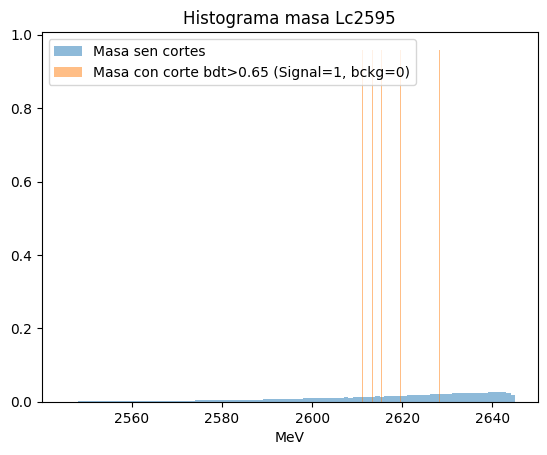

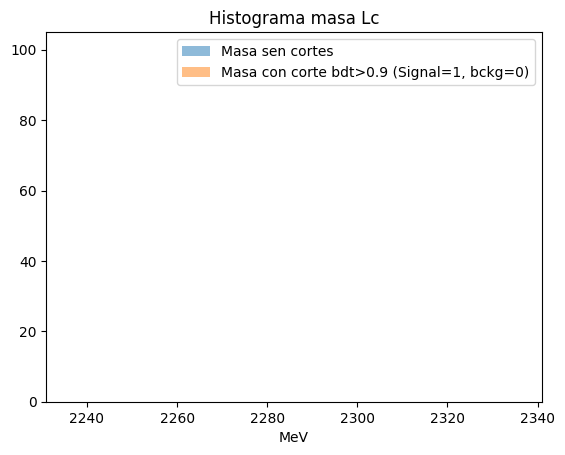

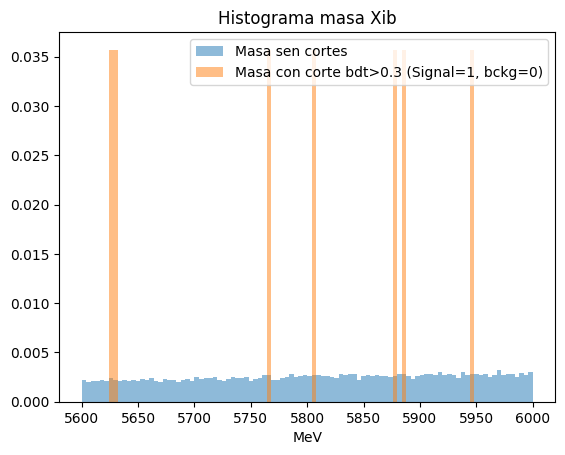

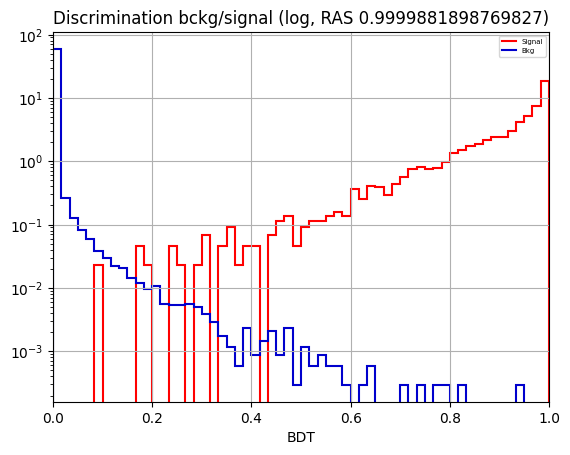

1


/tmp/brais.fernandez/ipykernel_1276538/1749358565.py:165: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


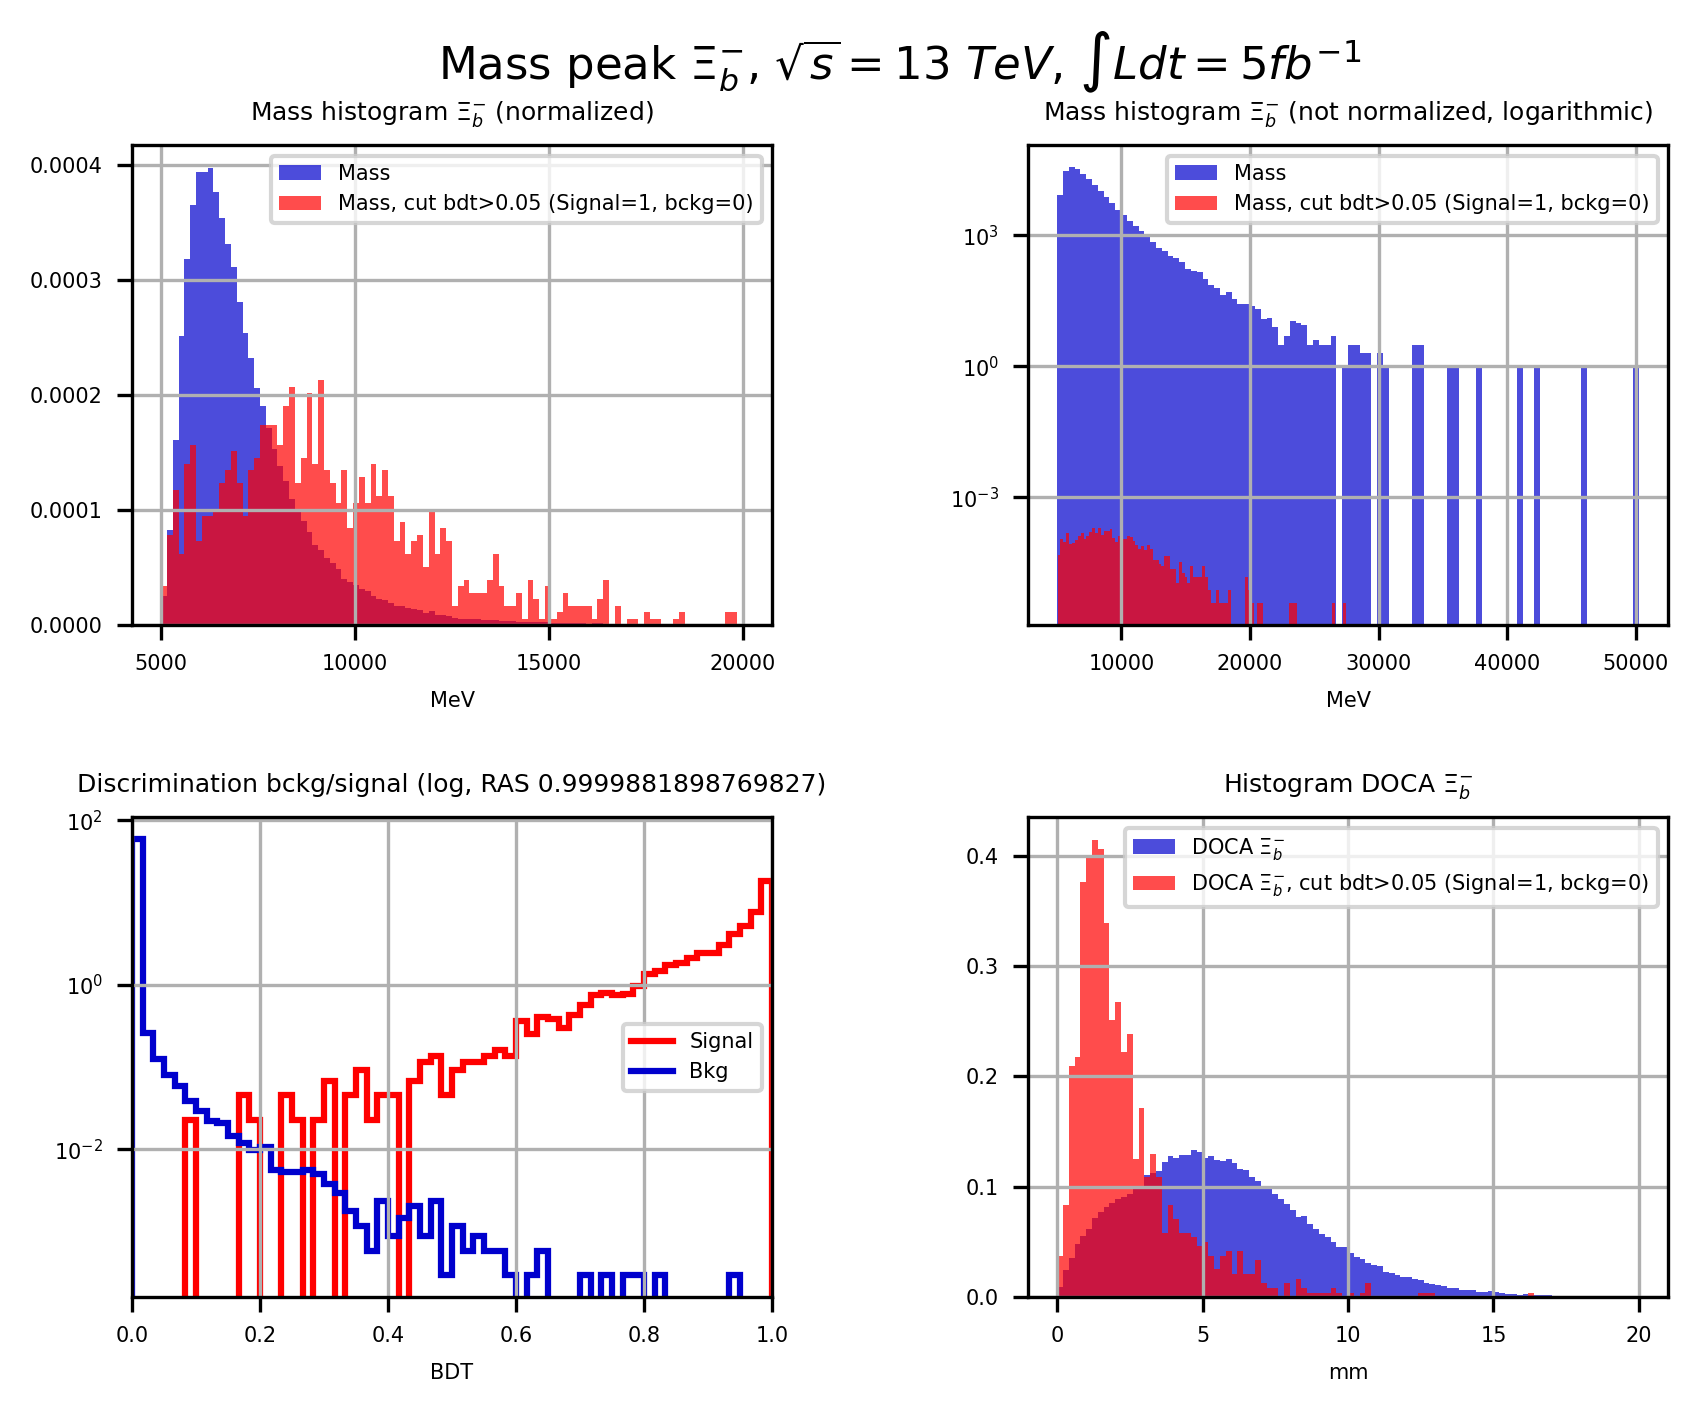

In [9]:
#TERCEIRA BDT, RECREAR O PICO DO Xib O MELLOR POSIBLE

#BDT

import mplhep
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
import sklearn
#as training columns ogs:
training_columns=['Lambdac2595_IPCHI2_OWNPV', 'Lambdac2595_FDCHI2_OWNPV', 'Lambdac2595_DIRA_OWNPV', 'Lambdac2595_PT', 'Lambdac_PT', 'Lambdac2595_ENDVERTEX_CHI2',
                   'Lambdac_ENDVERTEX_CHI2', 'Lambdac_IPCHI2_OWNPV', 'Lambdac_FDCHI2_OWNPV', 'Lambdac_DIRA_OWNPV', 'KFromLc_PT', 'pFromLc_PT', 'piFromLc_PT', 'pi1FromLc2595_PT',
                     'pi2FromLc2595_PT', 'KFromLc_IPCHI2_OWNPV', 'pFromLc_IPCHI2_OWNPV', 'piFromLc_IPCHI2_OWNPV', 'pi1FromLc2595_IPCHI2_OWNPV', 'pi2FromLc2595_IPCHI2_OWNPV',
                     'Lambda1_IPCHI2_OWNPV', 'Lambda2_IPCHI2_OWNPV', 'Lambda1_PT', 'Lambda2_PT']
                     #'Xib_ENDVERTEX_CHI2', 'Xib_DIRA_OWNPV',
                     #'Xib_IPCHI2_OWNPV', 'Xib_DOCA']




#training_columns=['Xib_ENDVERTEX_CHI2', 'Xib_DIRA_OWNPV',
 #                    'Xib_IPCHI2_OWNPV', 'Xib_DOCA', 'Xib_MM']

#concatenar os 3 dfs
df_Datos_=pd.concat([df_Datos1, df_Datos2, df_Datos3], axis=0)
df_Datos=data_dfn = df_Datos_.reset_index()


#bkg_df=df_Datos.query('Lambdac_MM>2310' or 'Lambdac2595_MM<2276').copy()
#bkg_df=df_Datos.query('Lambdac2595_MM>2610' or 'Lambdac2595_MM<2585').copy()
bkg_df=df_Datos.query(('Xib_MM>5900' or 'Xib_MM<5700') and ('Xib_ENDVERTEX_CHI2>0')).copy()

#print(bkg_df['Lambdac2595_MM'])

df_Datos1.to_json(r'/scratch48/dataframe2018.json'); df_Datos2.to_json(r'/scratch48/dataframe2017.json'); df_Datos3.to_json(r'/scratch48/dataframe2016.json')



#df_Datos.reset_index(inplace=True)
#df_Datos.to_json(r'/scratch48/dataframe.json')

bkg_df['category']=0
mc_df['category']=1

training_data = pd.concat([bkg_df, mc_df], copy=True, ignore_index=True)
%store training_data


bdt = XGBClassifier()
bdt.fit(training_data[training_columns], training_data['category'])


data_df=df_Datos.copy()

for df in [mc_df, bkg_df, data_df, training_data]:
    df['BDT'] = bdt.predict_proba(df[training_columns])[:,1]



#plot con/sen cuts bdt
plt.figure(8)
#plot sen cut en bdt
plt.title('Histograma masa Lc2595')
plt.hist(data_df['Lambdac2595_MM'], bins=100, alpha=0.5, density=True, label="Masa sen cortes")
#plot con cut en bdt
plt.hist(data_df[data_df['BDT']>0.65]['Lambdac2595_MM'], bins=100, alpha=0.5, density=True, label="Masa con corte bdt>0.65 (Signal=1, bckg=0)")
plt.legend(loc="best")
plt.xlabel("MeV")
plt.savefig('masalc2595.png')
plt.show()



#plot con/sen cuts bdt
plt.figure(9)
#plot sen cut en bdt
plt.title('Histograma masa Lc')
plt.hist(data_df['Lambdac_MM'], bins=100, alpha=0.5, density=True, label="Masa sen cortes")
#plot con cut en bdt
plt.hist(data_df[data_df['BDT']>0.9]['Lambdac_MM'], bins=100, alpha=0.5, density=True, label="Masa con corte bdt>0.9 (Signal=1, bckg=0)")
plt.legend(loc="best")
plt.xlabel("MeV")
plt.show()


#plot con/sen cuts bdt
plt.figure(9)
#plot sen cut en bdt
plt.title('Histograma masa Xib')
plt.hist(data_df['Xib_MM'], bins=100, alpha=0.5, density=True, label="Masa sen cortes", range=(5600, 6000))
#plot con cut en bdt
plt.hist(data_df[data_df['BDT']>0.3]['Xib_MM'], bins=100, alpha=0.5, density=True, label="Masa con corte bdt>0.3 (Signal=1, bckg=0)", range=(5600, 6000))
plt.legend(loc="best")
plt.xlabel("MeV")
plt.show()



#vemos se filtra ben ou non a bdt
def plot_comparision(var, mc_df, bkg_df):
    # create histograms
    hsig, bins = np.histogram(mc_df[var], bins=60, density=1, range=(0,1))
    hbkg, bins = np.histogram(bkg_df[var], bins=bins, density=1, range=(0,1))

    mplhep.histplot((hsig, bins), label='Signal', color="red")
    mplhep.histplot(hbkg, bins=bins, label='Bkg', color="mediumblue")
    plt.xlabel(var)
    plt.yscale("log")
    plt.grid()
    plt.title("Discrimination bckg/signal (log, RAS {})".format(sklearn.metrics.roc_auc_score(training_data['category'], training_data['BDT'])))
    plt.xlim(bins[0], bins[-1])
    plt.legend(loc='best', fontsize="5")
    
def plot_bkg(var, mc_df, bkg_df):
    # create histograms
    #hsig, bins = np.histogram(mc_df[var], bins=60, density=1, range=(0,1))
    hbkg, bins = np.histogram(bkg_df[var], bins=60, density=1, range=(0,1))

    #mplhep.histplot((hsig, bins), label='MC Signal', )
    mplhep.histplot(hbkg, bins=bins, label='MC Bkg')
    plt.xlabel(var)
    plt.xlim(bins[0], bins[-1])
    plt.legend(loc='best')



plot_comparision("BDT", mc_df, bkg_df)
plt.show()

print(len(data_df[data_df['BDT']>0.9]['Lambdac_MM']))







#CONXUNTO
fig = plt.figure(1315, dpi=300)
#título global

plt.rcParams.update({'font.size': 9})
plt.suptitle(r"Mass peak $\Xi^{-}_b$, $\sqrt{s}=13$ $TeV$, $\int Ldt=5 fb^{-1}$")


#FIXO O NÚMERO DE TICKS EN AMBOS EIXES!(pq me saen poucos nos subplots)
plt.locator_params(nbins=6)


#tamaño letra, sácoo ao final para ter tamaño normal no resto xd
plt.rcParams.update({'font.size': 5})
#spacing entre os subplots
#fig.tight_layout(pad=5.0)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)




plt.subplot(2, 2, 1)
plt.title(r'Mass histogram $\Xi^{-}_b$ (normalized)')
plt.hist(data_df['Xib_MM'], bins=100, alpha=0.7, label="Mass", density=True, color="mediumblue", range=(5000, 20000))
#plot con cut en bdt
plt.grid()
plt.hist(data_df[data_df['BDT']>0.05]['Xib_MM'], bins=100, alpha=0.7, density=True, label="Mass, cut bdt>0.05 (Signal=1, bckg=0)", color="red", range=(5000, 20000))
plt.legend(loc="best", fontsize="5")
plt.xlabel("MeV")


plt.subplot(2, 2, 2)
plt.title(r'Mass histogram $\Xi^{-}_b$ (not normalized, logarithmic)')
plt.yscale("log")
#plt.hist(data_df['Xib_MM'], bins=100, alpha=0.7, density=True, label="Mass", color="mediumblue")
plt.hist(data_df['Xib_MM'], bins=100, alpha=0.7, label="Mass", color="mediumblue")
#plot con cut en bdt
plt.grid()
plt.hist(data_df[data_df['BDT']>0.05]['Xib_MM'], bins=100, alpha=0.7, density=True, label="Mass, cut bdt>0.05 (Signal=1, bckg=0)", color="red")
plt.legend(loc="best", fontsize="5")
plt.xlabel("MeV")


plt.subplot(2, 2, 3)
plot_comparision("BDT", mc_df, bkg_df)




plt.subplot(2, 2, 4)
plt.title(r'Histogram DOCA $\Xi^{-}_b$')
plt.hist(data_df['Xib_DOCA'], bins=100, alpha=0.7, density=True, label=r"DOCA $\Xi^{-}_b$", color="mediumblue", range=(0, 20))
#plot con cut en bdt
plt.grid()
plt.hist(data_df[data_df['BDT']>0.05]['Xib_DOCA'], bins=100, alpha=0.7, density=True, label=r"DOCA $\Xi^{-}_b$, cut bdt>0.05 (Signal=1, bckg=0)", color="red", range=(0, 20))
plt.legend(loc="best", fontsize="5")
plt.xlabel("mm")


plt.rcParams.update({'font.size': 10})

Text(0.5, 0, 'MeV')

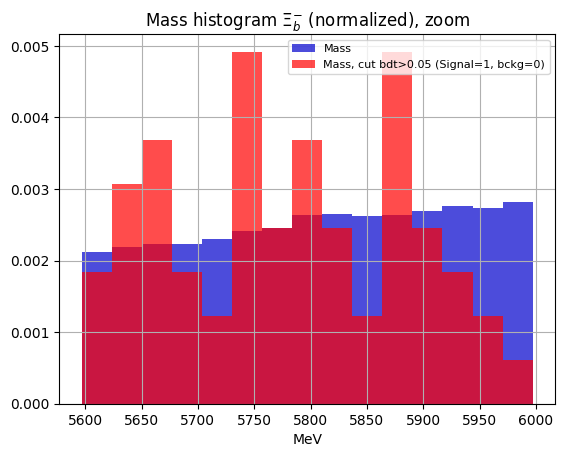

In [10]:
plt.figure(4325235)
plt.title(r'Mass histogram $\Xi^{-}_b$ (normalized), zoom')
#plt.yscale("log")
plt.hist(data_df['Xib_MM'], bins=15, alpha=0.7, density=True, label="Mass", color="mediumblue", range=(5797-200, 5797+200))
#plot con cut en bdt
plt.grid()
plt.hist(data_df[data_df['BDT']>0.05]['Xib_MM'], bins=15, alpha=0.7, density=True, label="Mass, cut bdt>0.05 (Signal=1, bckg=0)", color="red", range=(5797-200, 5797+200))
plt.legend(loc="best", fontsize="8")
plt.xlabel("MeV")

Text(0.5, 0, 'MeV/c')

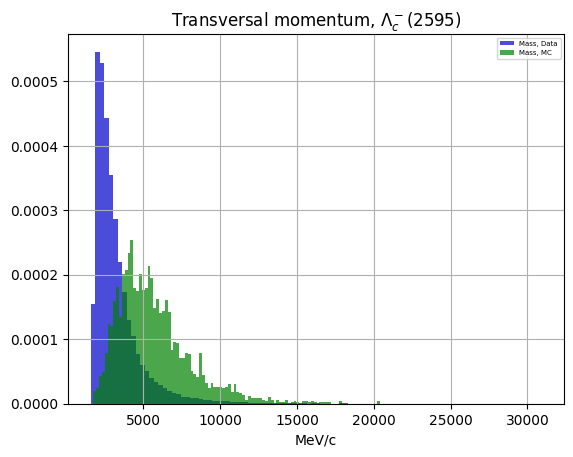

In [26]:
plt.plot()
plt.title(r'Transversal momentum, $\Lambda_c^-(2595)$')
plt.hist(data_df['Lambdac2595_PT'], bins=100, alpha=0.7, label="Mass, Data", density=True, color="mediumblue")
#plot con cut en bdt
plt.grid()
plt.hist(mc_df['Lambdac2595_PT'], bins=100, alpha=0.7, density=True, label="Mass, MC", color="green")
plt.legend(loc="best", fontsize="5")
plt.xlabel("MeV/c")



######
#'Lambdac2595_IPCHI2_OWNPV', 'Lambdac2595_FDCHI2_OWNPV', 'Lambdac2595_DIRA_OWNPV', 'Lambdac2595_PT', 'Lambdac_PT', 'Lambdac2595_ENDVERTEX_CHI2',
#                   'Lambdac_ENDVERTEX_CHI2', 'Lambdac_IPCHI2_OWNPV', 'Lambdac_FDCHI2_OWNPV', 'Lambdac_DIRA_OWNPV', 'KFromLc_PT', 'pFromLc_PT', 'piFromLc_PT', 'pi1FromLc2595_PT',
#                     'pi2FromLc2595_PT', 'KFromLc_IPCHI2_OWNPV', 'pFromLc_IPCHI2_OWNPV', 'piFromLc_IPCHI2_OWNPV', 'pi1FromLc2595_IPCHI2_OWNPV', 'pi2FromLc2595_IPCHI2_OWNPV',
#                     'Lambda1_IPCHI2_OWNPV', 'Lambda2_IPCHI2_OWNPV', 'Lambda1_PT', 'Lambda2_PT'
#######

/tmp/brais.fernandez/ipykernel_1276538/1081554232.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(data_df[data_df['pFromL1_TRACK_Type']==5][data_df['piFromL1_TRACK_Type']==5][data_df['pFromL2_TRACK_Type']==5][data_df['piFromL2_TRACK_Type']==5][data_df['BDT']>0.7]['Lambdac2595_DOCA'], bins=100, alpha=0.5, density=True, label="DOCA con corte bdt>0.7 (Signal=1, bckg=0), tracktype (5, 5), (5, 5)", color="purple")
/tmp/brais.fernandez/ipykernel_1276538/1081554232.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(data_df[data_df['pFromL1_TRACK_Type']==5][data_df['piFromL1_TRACK_Type']==5][data_df['pFromL2_TRACK_Type']==5][data_df['piFromL2_TRACK_Type']==5][data_df['BDT']>0.7]['Lambdac2595_DOCA'], bins=100, alpha=0.5, density=True, label="DOCA con corte bdt>0.7 (Signal=1, bckg=0), tracktype (5, 5), (5, 5)", color="purple")
/tmp/brais.fernandez/ipykernel_1276538/1081554232.py:11: UserWarning: Boolean Seri

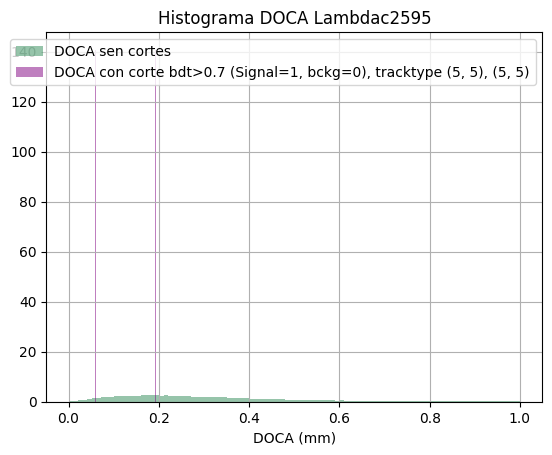

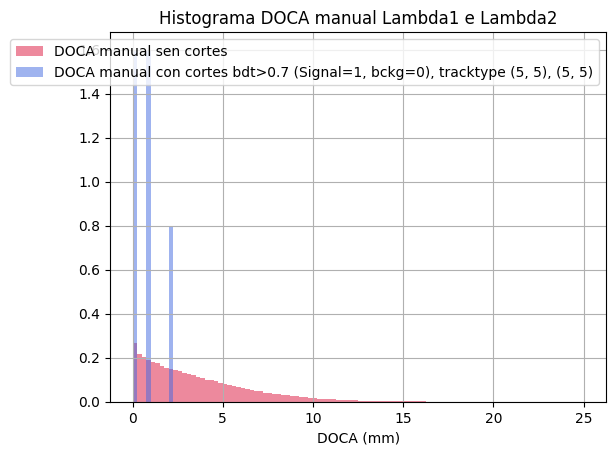

In [20]:
#Cálculo do DOCA para o Lambdac2595 a partir de L1 e L2
#Fágoo con tracktype (5, 5), (5, 5) porque reproduce ben o pico de masa
plt.figure(14151)
#plot sen cut en bdt


#range=(,)
plt.title('Histograma DOCA Lambdac2595')
plt.hist(data_df['Lambdac2595_DOCA'], bins=100, alpha=0.5, density=True, label="DOCA sen cortes", color="seagreen")
#plot con cut en bdt
plt.hist(data_df[data_df['pFromL1_TRACK_Type']==5][data_df['piFromL1_TRACK_Type']==5][data_df['pFromL2_TRACK_Type']==5][data_df['piFromL2_TRACK_Type']==5][data_df['BDT']>0.7]['Lambdac2595_DOCA'], bins=100, alpha=0.5, density=True, label="DOCA con corte bdt>0.7 (Signal=1, bckg=0), tracktype (5, 5), (5, 5)", color="purple")
plt.legend(loc="best")
plt.grid()
plt.xlabel("DOCA (mm)")
plt.show()


#Basicamente obteño, coa ecuación punto pendente das rectas, o DOCA para os datos con e sen cuts
docamanualsencortes=np.zeros(len(data_df['Lambda1_ENDVERTEX_X']))
docamanualconcortes=[]

for i in range(len(data_df['Lambda1_ENDVERTEX_X'])):
    ab=[data_df['Lambda1_ENDVERTEX_X'][i]-data_df['Lambda2_ENDVERTEX_X'][i], data_df['Lambda1_ENDVERTEX_Y'][i]-data_df['Lambda2_ENDVERTEX_Y'][i],
        data_df['Lambda1_ENDVERTEX_Z'][i]-data_df['Lambda2_ENDVERTEX_Z'][i]]
    u=[data_df['Lambda1_PX'][i], data_df['Lambda1_PY'][i], data_df['Lambda1_PZ'][i]]
    v=[data_df['Lambda2_PX'][i], data_df['Lambda2_PY'][i], data_df['Lambda2_PZ'][i]]
    a = np.array([ab, u, v])
    volume=np.linalg.det(a)
    cruz=np.cross(u, v)
    docamanualsencortes[i]=abs(volume)/(np.sqrt(cruz[0]**2+cruz[1]**2+cruz[2]**2))
    if data_df['pFromL1_TRACK_Type'][i]==5 and data_df['piFromL1_TRACK_Type'][i]==5 and data_df['pFromL2_TRACK_Type'][i]==5 and data_df['piFromL2_TRACK_Type'][i]==5 and data_df['BDT'][i]>0.7:
        docamanualconcortes.append(abs(volume)/(np.sqrt(cruz[0]**2+cruz[1]**2+cruz[2]**2)))


plt.title('Histograma DOCA manual Lambda1 e Lambda2')
plt.hist(docamanualsencortes, bins=100, density=True, alpha=0.5, color="crimson", range=(0, 25), label="DOCA manual sen cortes")
plt.hist(docamanualconcortes, bins=100, density=True, alpha=0.5, color="royalblue", range=(0, 25), label="DOCA manual con cortes bdt>0.7 (Signal=1, bckg=0), tracktype (5, 5), (5, 5)")
#plot con cut en bdt
plt.legend(loc="best")
plt.grid()
plt.xlabel("DOCA (mm)")
plt.show()
